In [3]:
# importing the necessary libraries
import os
import requests
import pandas as pd
import numpy as np
import pickle
import json

In [28]:
# open the city bikes csv file to enable comparison
df_city_bikes = pd.read_csv('city_bikes_df.csv')

In [30]:
df_city_bikes[['name']]

,name
0,Chilco & Barclay
1,St George & Broadway
2,Britannia Parking Lot
3,Morton & Denman
4,Thornton & National
...,...
253,7th & Heather
254,Union & Dunlevy
255,Richards & Helmcken
256,Keefer & Abbott


In [6]:
df_city_bikes

,Unnamed: 0,id,name,latitude,longitude,timestamp,free_bikes,empty_slots,extra.uid,extra.renting,extra.returning,extra.last_updated,extra.slots,extra.normal_bikes,extra.ebikes,extra.has_ebikes
0,0,00fa94ad698dc4a9e4d708d6fd32f294,Chilco & Barclay,49.291909,-123.140713,2025-02-08T08:10:50.124152Z,17,0,92,True,True,1739002136,18,15,2,True
1,1,012d3e06901cc222b1c2cf0a2ace3a29,St George & Broadway,49.262321,-123.093060,2025-02-08T08:10:50.529626Z,6,8,248,True,True,1739002022,14,5,1,True
2,2,029a505bd4422a1afd127987757f71a6,Britannia Parking Lot,49.275882,-123.071865,2025-02-08T08:10:50.528937Z,2,12,232,True,True,1739001589,14,2,0,True
3,3,0438114d2e6b96118de69bc9775bb21e,Morton & Denman,49.288030,-123.142135,2025-02-08T08:10:50.093341Z,12,14,31,True,True,1739001853,26,6,6,True
4,4,0459b7e93703980b853cd65a9dc60596,Thornton & National,49.273777,-123.092723,2025-02-08T08:10:50.528973Z,4,10,233,True,True,1739001524,14,4,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,253,fbb4c06b719596c21f91fd51ef6d4710,7th & Heather,49.265089,-123.119425,2025-02-08T08:10:50.123858Z,12,6,81,True,True,1739002135,18,11,1,True
254,254,fe0c57d04d6e682d284d501446095fc9,Union & Dunlevy,49.277595,-123.095830,2025-02-08T08:10:50.528015Z,5,11,212,True,True,1739002135,16,5,0,True
255,255,fedff7a263c182df94bda7307059cc52,Richards & Helmcken,49.277141,-123.122589,2025-02-08T08:10:50.299192Z,0,18,138,True,True,1739001816,18,0,0,True
256,256,fef69fb400210d861107a61db954d037,Keefer & Abbott,49.279821,-123.108020,2025-02-08T08:10:50.122810Z,15,13,53,True,True,1739001000,28,15,0,True


In [6]:
# get the api keys as environmenet variables

fsq_api_key = os.environ['FOURSQUARE_API_KEY']
yelp_api_key = os.environ['YELP_API_KEY']


KeyError: 'FOURSQUARE_API_KEY'

In [10]:
fsq_api_key

'fsq3l10+1OmxkHE/JNGIPPMOlh9Joar3YH7WHd3H9JqJ81g='

In [17]:
os.environ.get('FOURSQUARE_API_KEY')

'fsq3l10+1OmxkHE/JNGIPPMOlh9Joar3YH7WHd3H9JqJ81g='

In [19]:
df_city_bikes.reset_index()

,index,Unnamed: 0,id,name,latitude,longitude,timestamp,free_bikes,empty_slots,extra.uid,extra.renting,extra.returning,extra.last_updated,extra.slots,extra.normal_bikes,extra.ebikes,extra.has_ebikes
0,0,0,00fa94ad698dc4a9e4d708d6fd32f294,Chilco & Barclay,49.291909,-123.140713,2025-02-08T08:10:50.124152Z,17,0,92,True,True,1739002136,18,15,2,True
1,1,1,012d3e06901cc222b1c2cf0a2ace3a29,St George & Broadway,49.262321,-123.093060,2025-02-08T08:10:50.529626Z,6,8,248,True,True,1739002022,14,5,1,True
2,2,2,029a505bd4422a1afd127987757f71a6,Britannia Parking Lot,49.275882,-123.071865,2025-02-08T08:10:50.528937Z,2,12,232,True,True,1739001589,14,2,0,True
3,3,3,0438114d2e6b96118de69bc9775bb21e,Morton & Denman,49.288030,-123.142135,2025-02-08T08:10:50.093341Z,12,14,31,True,True,1739001853,26,6,6,True
4,4,4,0459b7e93703980b853cd65a9dc60596,Thornton & National,49.273777,-123.092723,2025-02-08T08:10:50.528973Z,4,10,233,True,True,1739001524,14,4,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,253,253,fbb4c06b719596c21f91fd51ef6d4710,7th & Heather,49.265089,-123.119425,2025-02-08T08:10:50.123858Z,12,6,81,True,True,1739002135,18,11,1,True
254,254,254,fe0c57d04d6e682d284d501446095fc9,Union & Dunlevy,49.277595,-123.095830,2025-02-08T08:10:50.528015Z,5,11,212,True,True,1739002135,16,5,0,True
255,255,255,fedff7a263c182df94bda7307059cc52,Richards & Helmcken,49.277141,-123.122589,2025-02-08T08:10:50.299192Z,0,18,138,True,True,1739001816,18,0,0,True
256,256,256,fef69fb400210d861107a61db954d037,Keefer & Abbott,49.279821,-123.108020,2025-02-08T08:10:50.122810Z,15,13,53,True,True,1739001000,28,15,0,True


In [38]:
idx = print(df_city_bikes.index)

RangeIndex(start=0, stop=258, step=1)


In [42]:
idx

# Foursquare

Send a request to Foursquare with a small radius (1000m) for all the bike stations in your city of choice. 

In [113]:
# check teh length of stations
N_stations = len(df_city_bikes)

In [30]:
N_stations

258

In [272]:
# define the parameters
radius = 1000
limit = 50
categories = '13049,19042,16032,19046,19047,18000'
idx = 7

url_foursquare = "https://api.foursquare.com/v3/places/search"

headers = {
    "accept": "application/json",
    "Authorization": fsq_api_key
}

In [274]:
df_results_all = []

for idx in range(258):

    lat = df_city_bikes['latitude'].iloc[idx]
    lng = df_city_bikes['longitude'].iloc[idx]
    ll = f"{lat},{lng}"

    params = {
        'radius': radius,
        'categories': categories,
        'll': ll,
        'limit': limit
    }


    response = requests.get(url_foursquare, headers=headers, params=params)

    results = response.json()

    df_results = pd.json_normalize(results['results'])
    df_results['bike_station_index'] = idx

    df_results_all.append(df_results)

In [107]:
#results

Parse through the response to get the POI (such as restaurants, bars, etc) details you want (ratings, name, location, etc)

Put your parsed results into a DataFrame

In [222]:
df_results

,fsq_id,categories,chains,closed_bucket,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,...,location.cross_street,location.formatted_address,location.locality,location.region,geocodes.drop_off.latitude,geocodes.drop_off.longitude,location.postcode,related_places.children,location.address_extended,bike_station_index
0,50f1dd8ee4b0ee8fd93bbfff,"[{'id': 10047, 'name': 'Public Art', 'short_na...",[],VeryLikelyOpen,84,/v3/places/50f1dd8ee4b0ee8fd93bbfff,Dude Chilling Park,America/Vancouver,49.263472,-123.096107,...,at Guelph Park,"400 E 8th Ave (at Guelph Park), Vancouver BC",Vancouver,BC,NaN,NaN,NaN,NaN,NaN,257
1,4f74d86fe4b0e7e85a1bfd18,"[{'id': 18021, 'name': 'Gym and Studio', 'shor...",[],LikelyOpen,617,/v3/places/4f74d86fe4b0e7e85a1bfd18,The Hive Bouldering Gym,America/Vancouver,49.268692,-123.092576,...,,"520 Industrial Ave, Vancouver BC V6A 2P3",Vancouver,BC,49.268947,-123.092533,V6A 2P3,[],NaN,257
2,57859a88498ee75da193d5c7,"[{'id': 13049, 'name': 'Diner', 'short_name': ...",[],LikelyOpen,438,/v3/places/57859a88498ee75da193d5c7,Fable Diner,America/Vancouver,49.263042,-123.101505,...,Main,"151 Broadway E (Main), Vancouver BC V5T 1W1",Vancouver,BC,NaN,NaN,V5T 1W1,NaN,NaN,257
3,4f2c7acce4b0c1a817bf4336,"[{'id': 18028, 'name': 'Yoga Studio', 'short_n...",[],LikelyOpen,745,/v3/places/4f2c7acce4b0c1a817bf4336,Moksha Yoga East Vancouver,America/Vancouver,49.257137,-123.092486,...,,"560 15th Ave E, Vancouver BC V5T 2R5",Vancouver,BC,NaN,NaN,V5T 2R5,NaN,NaN,257
4,4b2d2fcef964a5207bd024e3,"[{'id': 12080, 'name': 'Library', 'short_name'...",[],LikelyOpen,342,/v3/places/4b2d2fcef964a5207bd024e3,Mount Pleasant Community Centre,America/Vancouver,49.264143,-123.100139,...,Main Street,"1 Kingsway (Main Street), Vancouver BC V5T 3H7",Vancouver,BC,49.264096,-123.100501,V5T 3H7,NaN,NaN,257
5,4be73b80910020a16435d514,"[{'id': 16032, 'name': 'Park', 'short_name': '...",[],VeryLikelyOpen,897,/v3/places/4be73b80910020a16435d514,Jonathan Rogers Park,America/Vancouver,49.264274,-123.108018,...,NaN,"110 7th Ave W, Vancouver BC V5Y 1L7",Vancouver,BC,49.264726,-123.108009,V5Y 1L7,[],NaN,257
6,4ac9482df964a52086bf20e3,"[{'id': 13049, 'name': 'Diner', 'short_name': ...",[],LikelyOpen,370,/v3/places/4ac9482df964a52086bf20e3,Wallflower Modern Diner,America/Vancouver,49.263551,-123.100656,...,at E Broadway,"2420 Main St (at E Broadway), Vancouver BC V5T...",Vancouver,BC,NaN,NaN,V5T 3E2,NaN,NaN,257
7,4ab3d111f964a5209b6e20e3,"[{'id': 18023, 'name': 'Climbing Gym', 'short_...",[],Unsure,677,/v3/places/4ab3d111f964a5209b6e20e3,Cliffhanger Climbing Gym,America/Vancouver,49.268413,-123.090119,...,NaN,"670 Industrial Ave, Vancouver BC V6A 2P3",Vancouver,BC,49.268536,-123.090098,V6A 2P3,NaN,NaN,257
8,4aae6272f964a520f06120e3,"[{'id': 13034, 'name': 'Café', 'short_name': '...",[],VeryLikelyOpen,853,/v3/places/4aae6272f964a520f06120e3,Argo Cafe,America/Vancouver,49.268608,-123.104493,...,at 3rd Ave.,"1836 Ontario St (at 3rd Ave.), Vancouver BC V5...",Vancouver,BC,NaN,NaN,V5T 2W6,NaN,NaN,257
9,4bd636ff29eb9c7462d594e1,"[{'id': 16032, 'name': 'Park', 'short_name': '...",[],LikelyOpen,655,/v3/places/4bd636ff29eb9c7462d594e1,Robson Park,America/Vancouver,49.258125,-123.092003,...,NaN,"2982 Carolina St, Vancouver BC V5T 2N1",Vancouver,BC,NaN,NaN,V5T 2N1,NaN,# 2910,257


In [276]:
df_results_all = pd.concat(df_results_all)

In [278]:
df_results_all.reset_index()

,index,fsq_id,categories,chains,closed_bucket,distance,link,name,timezone,geocodes.main.latitude,...,related_places.parent.categories,related_places.parent.name,geocodes.drop_off.latitude,geocodes.drop_off.longitude,related_places.children,location.address_extended,bike_station_index,location.po_box,geocodes.front_door.latitude,geocodes.front_door.longitude
0,0,4bf046d53a002d7fb4eb85a4,"[{'id': 18075, 'name': 'Swimming Pool', 'short...",[],LikelyOpen,840,/v3/places/4bf046d53a002d7fb4eb85a4,Second Beach Pool,America/Vancouver,49.295495,...,"[{'id': 16039, 'name': 'Urban Park', 'short_na...",Stanley Park,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,1,4c49fa7642b4d13aefbe8c7c,"[{'id': 10055, 'name': 'Water Park', 'short_na...",[],LikelyOpen,933,/v3/places/4c49fa7642b4d13aefbe8c7c,Variety Kids Water Park in Stanley Park,America/Vancouver,49.297761,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,2,4cdc9e88fc973704e4d6d605,"[{'id': 18047, 'name': 'Tennis Court', 'short_...",[],LikelyOpen,354,/v3/places/4cdc9e88fc973704e4d6d605,Stanley Park Tennis Courts,America/Vancouver,49.292068,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,3,51e49d88498e7ce6654db1ca,"[{'id': 16032, 'name': 'Park', 'short_name': '...",[],VeryLikelyOpen,904,/v3/places/51e49d88498e7ce6654db1ca,Cardero Park,America/Vancouver,49.292249,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
4,4,4afa294cf964a5201e1722e3,"[{'id': 13034, 'name': 'Café', 'short_name': '...",[],VeryLikelyOpen,995,/v3/places/4afa294cf964a5201e1722e3,Bubble World,America/Vancouver,49.287422,...,NaN,NaN,49.287296,-123.128974,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11498,45,348c4db3e80b48b520c144bc,"[{'id': 16032, 'name': 'Park', 'short_name': '...",[],LikelyOpen,608,/v3/places/348c4db3e80b48b520c144bc,Tecumseh Park,NaN,49.262831,...,NaN,NaN,NaN,NaN,NaN,NaN,257,NaN,NaN,NaN
11499,46,91073fd3519446bba97b887c,"[{'id': 18021, 'name': 'Gym and Studio', 'shor...",[],LikelyOpen,633,/v3/places/91073fd3519446bba97b887c,Travis Maddox,NaN,49.268026,...,NaN,NaN,NaN,NaN,NaN,NaN,257,NaN,NaN,NaN
11500,47,ae336a20bd0247dd16f246c6,"[{'id': 18021, 'name': 'Gym and Studio', 'shor...",[],Unsure,685,/v3/places/ae336a20bd0247dd16f246c6,The Hive Climbing Gym,NaN,49.269687,...,NaN,NaN,49.269521,-123.095933,NaN,NaN,257,NaN,NaN,NaN
11501,48,a1bc6053934e4395a5b80379,"[{'id': 10000, 'name': 'Arts and Entertainment...",[],LikelyOpen,836,/v3/places/a1bc6053934e4395a5b80379,First Dance Vancouver,NaN,49.263296,...,NaN,NaN,49.263062,-123.107210,NaN,NaN,257,NaN,NaN,NaN


In [270]:
df_results_all.shape

(11503, 30)

In [280]:
df_results_all[['categories', 'bike_station_index']]

,categories,bike_station_index
0,"[{'id': 18075, 'name': 'Swimming Pool', 'short...",0
1,"[{'id': 10055, 'name': 'Water Park', 'short_na...",0
2,"[{'id': 18047, 'name': 'Tennis Court', 'short_...",0
3,"[{'id': 16032, 'name': 'Park', 'short_name': '...",0
4,"[{'id': 13034, 'name': 'Café', 'short_name': '...",0
...,...,...
45,"[{'id': 16032, 'name': 'Park', 'short_name': '...",257
46,"[{'id': 18021, 'name': 'Gym and Studio', 'shor...",257
47,"[{'id': 18021, 'name': 'Gym and Studio', 'shor...",257
48,"[{'id': 10000, 'name': 'Arts and Entertainment...",257


In [76]:
df_results.columns # see columns 

Index(['fsq_id', 'categories', 'chains', 'closed_bucket', 'distance', 'link',
       'name', 'timezone', 'geocodes.main.latitude', 'geocodes.main.longitude',
       'geocodes.roof.latitude', 'geocodes.roof.longitude', 'location.address',
       'location.country', 'location.cross_street',
       'location.formatted_address', 'location.locality', 'location.region',
       'geocodes.drop_off.latitude', 'geocodes.drop_off.longitude',
       'location.postcode', 'related_places.children',
       'location.address_extended', 'bike_station_index'],
      dtype='object')

In [282]:
df_joined = pd.merge(df_results_all,df_city_bikes,left_on='bike_station_index',right_on=df_city_bikes.index)

In [284]:
df_joined

,fsq_id,categories,chains,closed_bucket,distance,link,name_x,timezone,geocodes.main.latitude,geocodes.main.longitude,...,free_bikes,empty_slots,extra.uid,extra.renting,extra.returning,extra.last_updated,extra.slots,extra.normal_bikes,extra.ebikes,extra.has_ebikes
0,4bf046d53a002d7fb4eb85a4,"[{'id': 18075, 'name': 'Swimming Pool', 'short...",[],LikelyOpen,840,/v3/places/4bf046d53a002d7fb4eb85a4,Second Beach Pool,America/Vancouver,49.295495,-123.150919,...,17,0,92,True,True,1739002136,18,15,2,True
1,4c49fa7642b4d13aefbe8c7c,"[{'id': 10055, 'name': 'Water Park', 'short_na...",[],LikelyOpen,933,/v3/places/4c49fa7642b4d13aefbe8c7c,Variety Kids Water Park in Stanley Park,America/Vancouver,49.297761,-123.131480,...,17,0,92,True,True,1739002136,18,15,2,True
2,4cdc9e88fc973704e4d6d605,"[{'id': 18047, 'name': 'Tennis Court', 'short_...",[],LikelyOpen,354,/v3/places/4cdc9e88fc973704e4d6d605,Stanley Park Tennis Courts,America/Vancouver,49.292068,-123.145596,...,17,0,92,True,True,1739002136,18,15,2,True
3,51e49d88498e7ce6654db1ca,"[{'id': 16032, 'name': 'Park', 'short_name': '...",[],VeryLikelyOpen,904,/v3/places/51e49d88498e7ce6654db1ca,Cardero Park,America/Vancouver,49.292249,-123.128250,...,17,0,92,True,True,1739002136,18,15,2,True
4,4afa294cf964a5201e1722e3,"[{'id': 13034, 'name': 'Café', 'short_name': '...",[],VeryLikelyOpen,995,/v3/places/4afa294cf964a5201e1722e3,Bubble World,America/Vancouver,49.287422,-123.128893,...,17,0,92,True,True,1739002136,18,15,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11498,348c4db3e80b48b520c144bc,"[{'id': 16032, 'name': 'Park', 'short_name': '...",[],LikelyOpen,608,/v3/places/348c4db3e80b48b520c144bc,Tecumseh Park,NaN,49.262831,-123.104001,...,8,10,262,True,True,1739001737,18,7,1,True
11499,91073fd3519446bba97b887c,"[{'id': 18021, 'name': 'Gym and Studio', 'shor...",[],LikelyOpen,633,/v3/places/91073fd3519446bba97b887c,Travis Maddox,NaN,49.268026,-123.101037,...,8,10,262,True,True,1739001737,18,7,1,True
11500,ae336a20bd0247dd16f246c6,"[{'id': 18021, 'name': 'Gym and Studio', 'shor...",[],Unsure,685,/v3/places/ae336a20bd0247dd16f246c6,The Hive Climbing Gym,NaN,49.269687,-123.095905,...,8,10,262,True,True,1739001737,18,7,1,True
11501,a1bc6053934e4395a5b80379,"[{'id': 10000, 'name': 'Arts and Entertainment...",[],LikelyOpen,836,/v3/places/a1bc6053934e4395a5b80379,First Dance Vancouver,NaN,49.263296,-123.107204,...,8,10,262,True,True,1739001737,18,7,1,True


In [286]:
df_joined.shape

(11503, 46)

In [293]:
df_joined.to_csv('city_bike_share.csv')

# Yelp

Send a request to Yelp with a small radius (1000m) for all the bike stations in your city of choice. 

In [5]:
radius = 1000
#limit = 50
#categories = '13049,19042,16032,19046,19047,18000'
idx = 7

url_yelp = "https://api.yelp.com/v3/businesses/search?categories=restaurants&sort_by=best_match&limit=20"

headers = {
    "accept": "application/json",
    "authorization": "Bearer" + yelp_api_key
}



NameError: name 'yelp_api_key' is not defined

In [262]:
df_results_all_yelp = []

for idx in range(258):

    lat = df_city_bikes['latitude'].iloc[idx]
    lng = df_city_bikes['longitude'].iloc[idx]
    ll = f"{lat},{lng}"

    params = {
        'radius': radius,
        #'categories': categories,
        'latitude': lat,
        'longitude': lng
        #'limit': limit
    }


    response_yelp = requests.get(url_yelp, headers=headers, params=params)

    results_yelp = response.json()

    

In [252]:
results_yelp.keys()

dict_keys(['results', 'context'])

In [254]:
df_results_yelp = pd.json_normalize(results['results'])
df_results_yelp['bike_station_index'] = idx
df_results_all_yelp.append(df_results_yelp)

In [246]:
#df_results_yelp

In [256]:
df_results_all_yelp = pd.concat(df_results_all_yelp)

In [258]:
df_results_all_yelp.reset_index()

,index,fsq_id,categories,chains,closed_bucket,distance,link,name,timezone,geocodes.main.latitude,...,location.cross_street,location.formatted_address,location.locality,location.region,geocodes.drop_off.latitude,geocodes.drop_off.longitude,location.postcode,related_places.children,location.address_extended,bike_station_index
0,0,50f1dd8ee4b0ee8fd93bbfff,"[{'id': 10047, 'name': 'Public Art', 'short_na...",[],VeryLikelyOpen,84,/v3/places/50f1dd8ee4b0ee8fd93bbfff,Dude Chilling Park,America/Vancouver,49.263472,...,at Guelph Park,"400 E 8th Ave (at Guelph Park), Vancouver BC",Vancouver,BC,NaN,NaN,NaN,NaN,NaN,257
1,1,4f74d86fe4b0e7e85a1bfd18,"[{'id': 18021, 'name': 'Gym and Studio', 'shor...",[],LikelyOpen,617,/v3/places/4f74d86fe4b0e7e85a1bfd18,The Hive Bouldering Gym,America/Vancouver,49.268692,...,,"520 Industrial Ave, Vancouver BC V6A 2P3",Vancouver,BC,49.268947,-123.092533,V6A 2P3,[],NaN,257
2,2,57859a88498ee75da193d5c7,"[{'id': 13049, 'name': 'Diner', 'short_name': ...",[],LikelyOpen,438,/v3/places/57859a88498ee75da193d5c7,Fable Diner,America/Vancouver,49.263042,...,Main,"151 Broadway E (Main), Vancouver BC V5T 1W1",Vancouver,BC,NaN,NaN,V5T 1W1,NaN,NaN,257
3,3,4f2c7acce4b0c1a817bf4336,"[{'id': 18028, 'name': 'Yoga Studio', 'short_n...",[],LikelyOpen,745,/v3/places/4f2c7acce4b0c1a817bf4336,Moksha Yoga East Vancouver,America/Vancouver,49.257137,...,,"560 15th Ave E, Vancouver BC V5T 2R5",Vancouver,BC,NaN,NaN,V5T 2R5,NaN,NaN,257
4,4,4b2d2fcef964a5207bd024e3,"[{'id': 12080, 'name': 'Library', 'short_name'...",[],LikelyOpen,342,/v3/places/4b2d2fcef964a5207bd024e3,Mount Pleasant Community Centre,America/Vancouver,49.264143,...,Main Street,"1 Kingsway (Main Street), Vancouver BC V5T 3H7",Vancouver,BC,49.264096,-123.100501,V5T 3H7,NaN,NaN,257
5,5,4be73b80910020a16435d514,"[{'id': 16032, 'name': 'Park', 'short_name': '...",[],VeryLikelyOpen,897,/v3/places/4be73b80910020a16435d514,Jonathan Rogers Park,America/Vancouver,49.264274,...,NaN,"110 7th Ave W, Vancouver BC V5Y 1L7",Vancouver,BC,49.264726,-123.108009,V5Y 1L7,[],NaN,257
6,6,4ac9482df964a52086bf20e3,"[{'id': 13049, 'name': 'Diner', 'short_name': ...",[],LikelyOpen,370,/v3/places/4ac9482df964a52086bf20e3,Wallflower Modern Diner,America/Vancouver,49.263551,...,at E Broadway,"2420 Main St (at E Broadway), Vancouver BC V5T...",Vancouver,BC,NaN,NaN,V5T 3E2,NaN,NaN,257
7,7,4ab3d111f964a5209b6e20e3,"[{'id': 18023, 'name': 'Climbing Gym', 'short_...",[],Unsure,677,/v3/places/4ab3d111f964a5209b6e20e3,Cliffhanger Climbing Gym,America/Vancouver,49.268413,...,NaN,"670 Industrial Ave, Vancouver BC V6A 2P3",Vancouver,BC,49.268536,-123.090098,V6A 2P3,NaN,NaN,257
8,8,4aae6272f964a520f06120e3,"[{'id': 13034, 'name': 'Café', 'short_name': '...",[],VeryLikelyOpen,853,/v3/places/4aae6272f964a520f06120e3,Argo Cafe,America/Vancouver,49.268608,...,at 3rd Ave.,"1836 Ontario St (at 3rd Ave.), Vancouver BC V5...",Vancouver,BC,NaN,NaN,V5T 2W6,NaN,NaN,257
9,9,4bd636ff29eb9c7462d594e1,"[{'id': 16032, 'name': 'Park', 'short_name': '...",[],LikelyOpen,655,/v3/places/4bd636ff29eb9c7462d594e1,Robson Park,America/Vancouver,49.258125,...,NaN,"2982 Carolina St, Vancouver BC V5T 2N1",Vancouver,BC,NaN,NaN,V5T 2N1,NaN,# 2910,257


Parse through the response to get the POI (such as restaurants, bars, etc) details you want (ratings, name, location, etc)

Put your parsed results into a DataFrame

# Comparing Results

Which API provided you with more complete data? Provide an explanation. 

Get the top 10 restaurants according to their rating

# Data Exploration

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
sns.set_theme()


In [ ]:
# getting the joined data
city_bike_share = pd.read_csv('city_bike_share.csv')

In [7]:
city_bike_share

,Unnamed: 0.1,fsq_id,categories,chains,closed_bucket,distance,link,name_x,timezone,geocodes.main.latitude,...,free_bikes,empty_slots,extra.uid,extra.renting,extra.returning,extra.last_updated,extra.slots,extra.normal_bikes,extra.ebikes,extra.has_ebikes
0,0,4bf046d53a002d7fb4eb85a4,"[{'id': 18075, 'name': 'Swimming Pool', 'short...",[],LikelyOpen,840,/v3/places/4bf046d53a002d7fb4eb85a4,Second Beach Pool,America/Vancouver,49.295495,...,17,0,92,True,True,1739002136,18,15,2,True
1,1,4c49fa7642b4d13aefbe8c7c,"[{'id': 10055, 'name': 'Water Park', 'short_na...",[],LikelyOpen,933,/v3/places/4c49fa7642b4d13aefbe8c7c,Variety Kids Water Park in Stanley Park,America/Vancouver,49.297761,...,17,0,92,True,True,1739002136,18,15,2,True
2,2,4cdc9e88fc973704e4d6d605,"[{'id': 18047, 'name': 'Tennis Court', 'short_...",[],LikelyOpen,354,/v3/places/4cdc9e88fc973704e4d6d605,Stanley Park Tennis Courts,America/Vancouver,49.292068,...,17,0,92,True,True,1739002136,18,15,2,True
3,3,51e49d88498e7ce6654db1ca,"[{'id': 16032, 'name': 'Park', 'short_name': '...",[],VeryLikelyOpen,904,/v3/places/51e49d88498e7ce6654db1ca,Cardero Park,America/Vancouver,49.292249,...,17,0,92,True,True,1739002136,18,15,2,True
4,4,4afa294cf964a5201e1722e3,"[{'id': 13034, 'name': 'Café', 'short_name': '...",[],VeryLikelyOpen,995,/v3/places/4afa294cf964a5201e1722e3,Bubble World,America/Vancouver,49.287422,...,17,0,92,True,True,1739002136,18,15,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11498,11498,348c4db3e80b48b520c144bc,"[{'id': 16032, 'name': 'Park', 'short_name': '...",[],LikelyOpen,608,/v3/places/348c4db3e80b48b520c144bc,Tecumseh Park,NaN,49.262831,...,8,10,262,True,True,1739001737,18,7,1,True
11499,11499,91073fd3519446bba97b887c,"[{'id': 18021, 'name': 'Gym and Studio', 'shor...",[],LikelyOpen,633,/v3/places/91073fd3519446bba97b887c,Travis Maddox,NaN,49.268026,...,8,10,262,True,True,1739001737,18,7,1,True
11500,11500,ae336a20bd0247dd16f246c6,"[{'id': 18021, 'name': 'Gym and Studio', 'shor...",[],Unsure,685,/v3/places/ae336a20bd0247dd16f246c6,The Hive Climbing Gym,NaN,49.269687,...,8,10,262,True,True,1739001737,18,7,1,True
11501,11501,a1bc6053934e4395a5b80379,"[{'id': 10000, 'name': 'Arts and Entertainment...",[],LikelyOpen,836,/v3/places/a1bc6053934e4395a5b80379,First Dance Vancouver,NaN,49.263296,...,8,10,262,True,True,1739001737,18,7,1,True


In [8]:
city_bike_share.columns

Index(['Unnamed: 0.1', 'fsq_id', 'categories', 'chains', 'closed_bucket',
       'distance', 'link', 'name_x', 'timezone', 'geocodes.main.latitude',
       'geocodes.main.longitude', 'geocodes.roof.latitude',
       'geocodes.roof.longitude', 'location.address', 'location.country',
       'location.cross_street', 'location.formatted_address',
       'location.locality', 'location.postcode', 'location.region',
       'related_places.parent.fsq_id', 'related_places.parent.categories',
       'related_places.parent.name', 'geocodes.drop_off.latitude',
       'geocodes.drop_off.longitude', 'related_places.children',
       'location.address_extended', 'bike_station_index', 'location.po_box',
       'geocodes.front_door.latitude', 'geocodes.front_door.longitude',
       'Unnamed: 0', 'id', 'name_y', 'latitude', 'longitude', 'timestamp',
       'free_bikes', 'empty_slots', 'extra.uid', 'extra.renting',
       'extra.returning', 'extra.last_updated', 'extra.slots',
       'extra.normal_bikes'

In [18]:
city_bike_share_columns = pd.read_csv('city_bike_column_dropped.csv')

In [20]:
city_bike_share_columns.columns

Index(['Unnamed: 0.1', 'fsq_id', 'categories', 'chains', 'closed_bucket',
       'distance', 'link', 'name_x', 'timezone', 'geocodes.main.latitude',
       'geocodes.main.longitude', 'geocodes.roof.latitude',
       'geocodes.roof.longitude', 'location.address', 'location.country',
       'location.cross_street', 'location.formatted_address',
       'location.locality', 'location.postcode', 'location.region',
       'related_places.parent.fsq_id', 'related_places.parent.categories',
       'related_places.parent.name', 'geocodes.drop_off.latitude',
       'geocodes.drop_off.longitude', 'related_places.children',
       'location.address_extended', 'bike_station_index', 'location.po_box',
       'geocodes.front_door.latitude', 'geocodes.front_door.longitude',
       'Unnamed: 0', 'id', 'name_y', 'latitude', 'longitude', 'timestamp',
       'free_bikes', 'empty_slots', 'extra.uid', 'extra.renting',
       'extra.returning', 'extra.last_updated', 'extra.slots',
       'extra.normal_bikes'

In [23]:
df_dropped_columns = city_bike_share_columns.drop(['extra.uid', 'extra.renting',
       'extra.returning', 'extra.last_updated', 'extra.slots',
       'extra.normal_bikes', 'extra.ebikes', 'extra.has_ebikes'], axis=1)

In [24]:
df_dropped_columns.columns

Index(['Unnamed: 0.1', 'fsq_id', 'categories', 'chains', 'closed_bucket',
       'distance', 'link', 'name_x', 'timezone', 'geocodes.main.latitude',
       'geocodes.main.longitude', 'geocodes.roof.latitude',
       'geocodes.roof.longitude', 'location.address', 'location.country',
       'location.cross_street', 'location.formatted_address',
       'location.locality', 'location.postcode', 'location.region',
       'related_places.parent.fsq_id', 'related_places.parent.categories',
       'related_places.parent.name', 'geocodes.drop_off.latitude',
       'geocodes.drop_off.longitude', 'related_places.children',
       'location.address_extended', 'bike_station_index', 'location.po_box',
       'geocodes.front_door.latitude', 'geocodes.front_door.longitude',
       'Unnamed: 0', 'id', 'name_y', 'latitude', 'longitude', 'timestamp',
       'free_bikes', 'empty_slots'],
      dtype='object')

In [25]:
df_dropped_columns['categories'].value_counts()

categories
[{'id': 18021, 'name': 'Gym and Studio', 'short_name': 'Gym and Studio', 'plural_name': 'Gym and Studios', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}}]                                                                                                                                                                                                                                                                                                                                                                                                                                                           2239
[{'id': 16032, 'name': 'Park', 'short_name': 'Park', 'plural_name': 'Parks', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}}]                                                                                                                                                                  

In [32]:
df_dropped_columns['name_y'].value_counts() # note that name_y is the stations. This is going to be renamed to stations for a clearer understanding.count
df_dropped_columns['stations'] = df_dropped_columns['name_y']

In [34]:
df_dropped_columns[['stations']].value_counts()

stations                              
10th & Cambie                             50
Cypress & 10th                            50
10th & Columbia                           50
Dunbar & Broadway                         50
Dunsmuir & Beatty                         50
                                          ..
Brock Commons                             20
Trimble & 8th                             19
Sasamat & 10th                            16
Arbutus & Nanton                          14
Stanley Park - Third Beach Parking Lot     6
Name: count, Length: 258, dtype: int64

In [36]:
df_dropped_columns[['name_x']].value_counts()

name_x                         
Fitness World                      120
Caffe Barney                        50
Orangetheory Fitness                50
Robert Lee YMCA Pool                49
Creekside Park                      49
                                  ... 
IDance Studios                       1
Stella Gym                           1
Unity Integration Studios            1
Devine Fitness & Pilates             1
kerrisdale cyclone Taylor arena      1
Name: count, Length: 960, dtype: int64

In [37]:
df_dropped_columns[['fsq_id']].value_counts()

fsq_id                  
5806abc3d67c62c5c465643d    49
5501d248498ec8482e74c7f4    48
4d2d106da40da35d3af78e77    47
51f58381498ea9240bf344ce    46
4d114e17437c236a5d6c8e7d    45
                            ..
4bc18891920eb71349ef1a2c     1
948d7cf7b1a140a63b4eee52     1
93f88e578e55429cba8ac936     1
542dd7c3498ef8a716fff6d9     1
ff1254690f7e47b98456aa08     1
Name: count, Length: 1013, dtype: int64

In [39]:
df_dropped_columns[['bike_station_index', 'categories']].value_counts()

bike_station_index  categories                                                                                                                                                                                                                                                                                                                                                                                                                                                               
174                 [{'id': 18021, 'name': 'Gym and Studio', 'short_name': 'Gym and Studio', 'plural_name': 'Gym and Studios', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}}]                                                                                                                                                                                                                                                                    17
103                 [{'id': 18021, 'na

In [43]:
df_dropped_columns_sorted = df_dropped_columns.sort_values('categories')

<Axes: xlabel='bike_station_index', ylabel='free_bikes'>

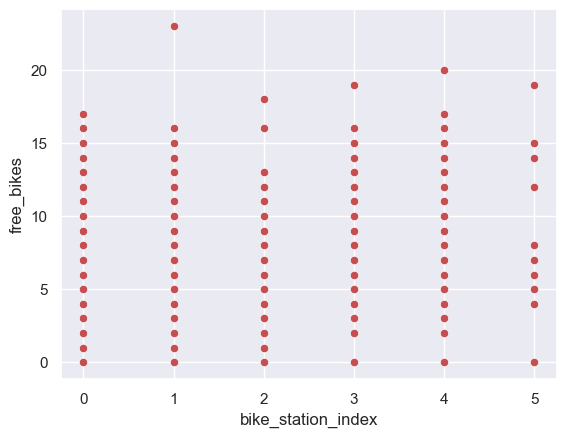

In [ ]:
sns.scatterplot(x=df_dropped_columns['fsq'],y=df_city_bikes['free_bikes'],c='r')


In [ ]:
sns.heatmap(df_dropped_columns_sorted.corr(numeric_only=True))


ValueError: could not convert string to float: 'a1bc6053934e4395a5b80379'

In [ ]:
df

In [ ]:
sb.scatterplot(x=df_results_all['geocodes.main.longitude'],y=df_results_all['geocodes.main.latitude'],c='b')

In [47]:
# Convert string representation of lists into actual lists
import ast
df_dropped_columns_sorted['categories'] = df_dropped_columns_sorted['categories'].apply(ast.literal_eval)

In [49]:
# Extract category names
df_dropped_columns_sorted['category_names'] = df_dropped_columns_sorted['categories'].apply(lambda x: [d['name'] for d in x])

In [53]:
# view the first 5 rows
df_dropped_columns_sorted.head()

,Unnamed: 0.1,fsq_id,categories,chains,closed_bucket,distance,link,name_x,timezone,geocodes.main.latitude,...,Unnamed: 0,id,name_y,latitude,longitude,timestamp,free_bikes,empty_slots,stations,category_names
11501,11501,a1bc6053934e4395a5b80379,"[{'id': 10000, 'name': 'Arts and Entertainment...",[],LikelyOpen,836,/v3/places/a1bc6053934e4395a5b80379,First Dance Vancouver,NaN,49.263296,...,257,fffd87607aaae16fbb1f71615cbe7d17,8th & Prince Edward,49.263518,-123.095680,2025-02-08T08:10:50.530814Z,8,10,8th & Prince Edward,"[Arts and Entertainment, Dance Studio]"
10654,10654,13723319ace94aa3d0ed4bc9,"[{'id': 10000, 'name': 'Arts and Entertainment...",[],Unsure,850,/v3/places/13723319ace94aa3d0ed4bc9,Salsa & Tango Dance Susana Domingues,NaN,49.261631,...,239,ea9485fcdce0611243474d000e4ad248,18th & Cambie,49.254818,-123.114785,2025-02-08T08:10:50.556346Z,6,18,18th & Cambie,"[Arts and Entertainment, Dance Studio]"
494,494,13723319ace94aa3d0ed4bc9,"[{'id': 10000, 'name': 'Arts and Entertainment...",[],Unsure,450,/v3/places/13723319ace94aa3d0ed4bc9,Salsa & Tango Dance Susana Domingues,NaN,49.261631,...,10,07b13214cb69f2ec007d888450f3d6bc,13th & Cambie,49.259579,-123.114769,2025-02-08T08:10:50.532118Z,5,9,13th & Cambie,"[Arts and Entertainment, Dance Studio]"
6935,6935,4d2621522f77a09011c60cf1,"[{'id': 10000, 'name': 'Arts and Entertainment...",[],LikelyOpen,859,/v3/places/4d2621522f77a09011c60cf1,Night and Day Dance,America/Vancouver,49.282145,...,153,9a48ca226f82f52d02707b054ebc7e9e,Princess & Union,49.277615,-123.091654,2025-02-08T08:10:50.528136Z,8,4,Princess & Union,"[Arts and Entertainment, Dance Studio]"
6848,6848,13723319ace94aa3d0ed4bc9,"[{'id': 10000, 'name': 'Arts and Entertainment...",[],Unsure,863,/v3/places/13723319ace94aa3d0ed4bc9,Salsa & Tango Dance Susana Domingues,NaN,49.261631,...,151,988f8f74c4a12d1a30ddf2f7cd6318f8,Charleson Park,49.267628,-123.127698,2025-02-08T08:10:50.299604Z,10,4,Charleson Park,"[Arts and Entertainment, Dance Studio]"
